In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import nltk
import os
import collections
import re
import string

import preprocessor as p
import ktrain
from ktrain import text
import nltk
from sklearn.preprocessing import LabelEncoder


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../preprocess_data.csv",index_col=0)
df= df.dropna()
df.head()

,Unnamed: 0,_id,text,task_1,task_2,text_clean
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN,made amp amp onli abl start make money sustain...
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN,technic still turn back clock dick head
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE,govt stop think world media liber gang ani opt...
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN,soldier japan dick head
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN,would better ask think sleazi shitbag lmao


In [3]:
LE = LabelEncoder()
LE.fit(df['task_2'])
classes= list(LE.classes_)
classes

['HATE', 'NONE', 'OFFN', 'PRFN']

In [4]:
df['task_2'] = LE.fit_transform(df['task_2'])
task1_params = dict(zip(LE.classes_, LE.transform(LE.classes_)))
df.head()

,Unnamed: 0,_id,text,task_1,task_2,text_clean
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,3,made amp amp onli abl start make money sustain...
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,2,technic still turn back clock dick head
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,1,govt stop think world media liber gang ani opt...
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,2,soldier japan dick head
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,2,would better ask think sleazi shitbag lmao


In [5]:
LE.fit(df['task_2'])
classes= list(LE.classes_)
classes

[0, 1, 2, 3]

In [6]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text_clean'], df['task_2'], 
                                                                    random_state=42, 
                                                                    test_size=0.1)

In [7]:
X_train = train_text.tolist()
X_test = temp_text.tolist()

y_train = train_labels.tolist()
y_test = temp_labels.tolist()

In [8]:
import ktrain
from ktrain import text
MODEL_NAME = 'models--distilbert--distilbert-base-uncased'  # replace this with model of choice
t = text.Transformer(MODEL_NAME, maxlen=500, class_names=classes)
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)
history = learner.fit_onecycle(5e-5, 2)
learner.validate(class_names=classes) # class_names must be string values

preprocessing train...
language: en
train sequence lengths:
	mean : 14
	95percentile : 27
	99percentile : 31


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 14
	95percentile : 27
	99percentile : 31




begin training using onecycle policy with max lr of 5e-05...
Epoch 1/2
576/576 [==============================] - 3322s 6s/step - loss: 1.0230 - accuracy: 0.5696 - val_loss: 1.0195 - val_accuracy: 0.5443
Epoch 2/2
12/12 [==============================] - 13s 967ms/step
              precision    recall  f1-score   support

           0       0.35      0.33      0.34        67
           1       0.61      0.64      0.63       121
           2       0.41      0.25      0.31        68
           3       0.73      0.88      0.80       128

    accuracy                           0.60       384
   macro avg       0.53      0.53      0.52       384
weighted avg       0.57      0.60      0.58       384



array([[ 22,  23,  18,   4],
       [ 22,  78,   5,  16],
       [ 15,  15,  17,  21],
       [  3,  11,   1, 113]], dtype=int64)

In [9]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr', 'iterations', 'momentum'])


In [11]:
print(history.history)

{'loss': [1.022960901260376, 0.8271234035491943], 'accuracy': [0.5696495771408081, 0.6631914377212524], 'val_loss': [1.0194531679153442, 0.9426718354225159], 'val_accuracy': [0.5442708134651184, 0.5989583134651184], 'lr': [5e-06, 5.078125e-06, 5.15625e-06, 5.234375e-06, 5.3125e-06, 5.390625e-06, 5.46875e-06, 5.546875e-06, 5.625e-06, 5.703125e-06, 5.78125e-06, 5.859375e-06, 5.9375e-06, 6.015625e-06, 6.09375e-06, 6.171875e-06, 6.25e-06, 6.328125e-06, 6.40625e-06, 6.484375e-06, 6.5625e-06, 6.640625e-06, 6.71875e-06, 6.796875e-06, 6.875e-06, 6.953125e-06, 7.03125e-06, 7.109375e-06, 7.1875e-06, 7.265625e-06, 7.34375e-06, 7.421875e-06, 7.5e-06, 7.578125e-06, 7.65625e-06, 7.734375e-06, 7.8125e-06, 7.890625e-06, 7.96875e-06, 8.046875e-06, 8.125e-06, 8.203125e-06, 8.28125e-06, 8.359375e-06, 8.4375e-06, 8.515625e-06, 8.59375e-06, 8.671875e-06, 8.75e-06, 8.828125e-06, 8.90625e-06, 8.984375e-06, 9.0625e-06, 9.140625e-06, 9.21875e-06, 9.296875e-06, 9.375e-06, 9.453125e-06, 9.53125e-06, 9.609375e-06

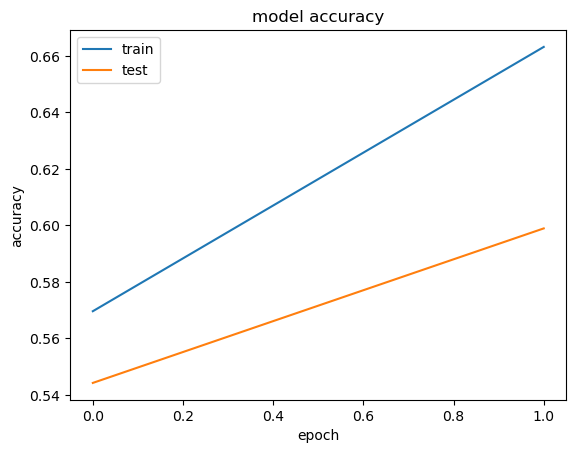

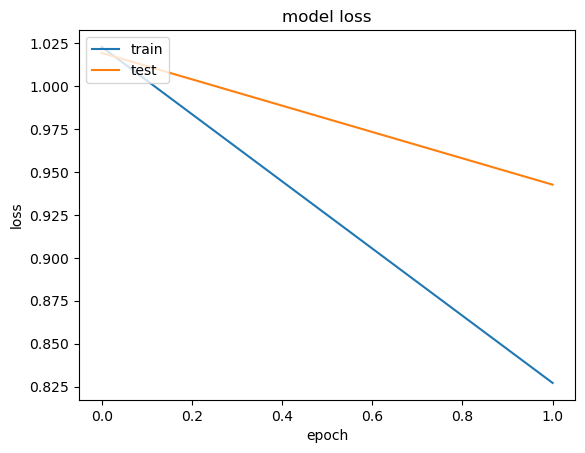

In [10]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
learner.view_top_losses(n=1, preproc=t)

12/12 [==============================] - 10s 794ms/step
----------
id:203 | loss:5.11 | true:3 | pred:0)



In [14]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [15]:
predictor.save('bert_B')

In [16]:
reloaded_predictor = ktrain.load_predictor('bert_B')

In [17]:
df_ans = pd.read_csv("../preprocess_test_data.csv",index_col=0)
df_ans['text_clean'] = df_ans['text_clean'].fillna('neutral')
df_ans.head()

,_id,text,text_clean
0,60c5d6bf5659ea5e55deffcb,Fewer people coming in for vaccinations. So sa...,fewer peopl come vaccin sad nurs covidvaccin vumc
1,60c5d6bf5659ea5e55df028c,@MattHancock This may all be true. But... What...,may true piss big dom
2,60c5d6bf5659ea5e55def377,@Layla_EFC I’ve unfollowed him the wanker,unfollow wanker
3,60c5d6bf5659ea5e55def4c7,You guys are losing it all over the world. The...,guy lose world jung label islamophobia
4,60c5d6bf5659ea5e55df01a6,"And thus death laughs... It is sad merriment, ...",thus death laugh sad merriment still covid ind...


In [18]:
label = []
i = 0
for tweet in df_ans['text_clean'].tolist():
    ans = reloaded_predictor.predict(tweet)
    i += 1
    print(i,len(tweet))
    if (ans == 0):
        label.append('HATE')
    elif (ans == 1):
        label.append('NONE')
    elif (ans == 2):
        label.append('OFFN')
    elif (ans == 3):
        label.append('PRFN')

1 49
2 21
3 15
4 38
5 64
6 47
7 9
8 106
9 39
10 93
11 35
12 138
13 57
14 99
15 188
16 4
17 56
18 179
19 48
20 79
21 31
22 65
23 166
24 125
25 89
26 61
27 65
28 147
29 45
30 131
31 86
32 76
33 118
34 33
35 91
36 6
37 127
38 64
39 98
40 50
41 92
42 189
43 121
44 22
45 31
46 176
47 166
48 33
49 128
50 99
51 74
52 26
53 89
54 25
55 170
56 15
57 119
58 37
59 44
60 106
61 9
62 67
63 27
64 45
65 139
66 24
67 32
68 65
69 228
70 165
71 78
72 159
73 119
74 26
75 211
76 143
77 39
78 195
79 64
80 52
81 69
82 53
83 13
84 19
85 165
86 113
87 115
88 75
89 137
90 17
91 123
92 85
93 80
94 35
95 35
96 165
97 36
98 56
99 19
100 72
101 24
102 84
103 145
104 26
105 163
106 57
107 164
108 94
109 11
110 109
111 98
112 28
113 135
114 110
115 20
116 173
117 17
118 69
119 43
120 158
121 174
122 137
123 123
124 196
125 192
126 101
127 40
128 26
129 189
130 183
131 165
132 64
133 4
134 98
135 59
136 58
137 120
138 43
139 198
140 72
141 74
142 110
143 23
144 51
145 51
146 75
147 54
148 91
149 156
150 131
151 38
15

In [19]:
df_ans['label'] = pd.Series(label)
df_ans.head(20)

,_id,text,text_clean,label
0,60c5d6bf5659ea5e55deffcb,Fewer people coming in for vaccinations. So sa...,fewer peopl come vaccin sad nurs covidvaccin vumc,NONE
1,60c5d6bf5659ea5e55df028c,@MattHancock This may all be true. But... What...,may true piss big dom,PRFN
2,60c5d6bf5659ea5e55def377,@Layla_EFC I’ve unfollowed him the wanker,unfollow wanker,PRFN
3,60c5d6bf5659ea5e55def4c7,You guys are losing it all over the world. The...,guy lose world jung label islamophobia,NONE
4,60c5d6bf5659ea5e55df01a6,"And thus death laughs... It is sad merriment, ...",thus death laugh sad merriment still covid ind...,NONE
5,60c5d6bf5659ea5e55def837,Oh shooooot. IPL has been suspended 😱 #Cricke...,oh shooooot ipl suspend cricket indiacovidcrisi,NONE
6,60c5d6bf5659ea5e55def6ec,Fuck y’all lmao https://t.co/n9SX9ThxRv,fuck lmao,PRFN
7,60c5d6bf5659ea5e55def29e,@narendramodi you are the one to blame for the...,one blame mess india vision solut pr puppet tu...,NONE
8,60c5d6bf5659ea5e55defa01,dont ask me to cook anything aside from poultr...,dont ask cook anyth asid poultri though,NONE
9,60c5d6bf5659ea5e55def464,"""The world suffers a lot. Not because of the v...",world suffer lot becaus violenc bad peopl beca...,HATE


In [20]:
df_ans = df_ans.drop(['text','text_clean'],axis=1)
df_ans = df_ans.reset_index()
df_ans = df_ans.drop(['index'],axis=1)
df_ans.head()

,_id,label
0,60c5d6bf5659ea5e55deffcb,NONE
1,60c5d6bf5659ea5e55df028c,PRFN
2,60c5d6bf5659ea5e55def377,PRFN
3,60c5d6bf5659ea5e55def4c7,NONE
4,60c5d6bf5659ea5e55df01a6,NONE


In [21]:
df_ans.to_csv('BERT_B.csv',index=False)